<a href="https://colab.research.google.com/gist/22961-Deep-learning/4c251c14e1a3afcf5a2621b6dc6f5a94/22961_2_1_2_single_neuron_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import sklearn.datasets as skds
import torch
import matplotlib.pyplot as plt

In [18]:
X, Y = skds.make_blobs(n_samples=100,n_features=2,
                       centers=2,random_state=1)
X=torch.tensor(X)
Y=torch.tensor(Y)

In [19]:
print(X[1:5,:],Y[1:5])

tensor([[-9.1516, -4.8129],
        [-3.1037,  3.9020],
        [-1.4295,  5.1685],
        [-7.4694, -4.2020]], dtype=torch.float64) tensor([1, 0, 0, 1], dtype=torch.int32)


In [20]:
def draw_05_line():
  line=lambda x:-w0/w1*x-b/w1
  x0=torch.tensor([-11,0])
  x1=line(x0)

  plt.plot(x0,x1);
  plt.scatter(X[:, 0], X[:, 1],
              c=Y, cmap="Greys", edgecolor="black");

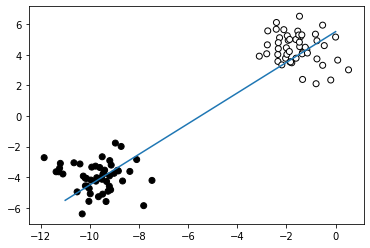

In [21]:
w0, w1, b = 1, -1, 5.5
draw_05_line()

In [22]:
z =     lambda w0,w1,b,x0,x1: w0*x0+w1*x1+b
y =     lambda z: 1/(1+torch.exp(-z))
model = lambda w0,w1,b,x0,x1: y(z(w0, w1, b,x0,x1))

In [23]:
def draw_prob_contours():
  x0, x1 = torch.linspace(-12, 1, 100), torch.linspace(-7, 7, 100)
  grid0,grid1=torch.meshgrid(x0,x1)
  fig = plt.contour(grid0,grid1,model(w0, w1, b,grid0,grid1),cmap="Greys")
  fig.clabel(inline=True, fontsize=10)
  plt.scatter(X[:, 0], X[:, 1],
            c=Y, cmap="Greys", edgecolor="black");

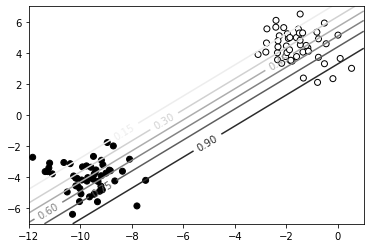

In [24]:
draw_prob_contours()

In [25]:
dHdy =  lambda y,yt: -(yt-y)/(y-y**2)
dydz =  lambda y: y*(1-y)
dzdw0 = lambda x0: x0
dzdw1 = lambda x1: x1
dzdb =  1
def calc_dC():
  dH=torch.zeros(len(Y),3)
  for idx in range(len(Y)):
    data=(X[idx,0],X[idx,1],Y[idx])
    y_model=y(z(w0,w1,b,data[0],data[1]))
    
    A=dHdy(y_model,data[2])
    B=dydz(y_model)
    dH[idx,0]=A*B*dzdw0(data[0])
    dH[idx,1]=A*B*dzdw1(data[1])
    dH[idx,2]=A*B*dzdb
  return dH.mean(0)
dC=calc_dC()

In [26]:
dC

tensor([ 2.4333,  1.7574, -0.0710])

In [27]:
w0, w1, b = 1, -1, 5.5

tensor(0.7567) tensor(-1.1757) tensor(5.5071)


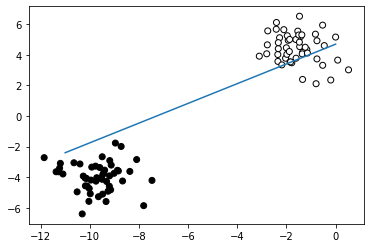

In [28]:
alpha=0.1
dC=calc_dC()
(w0, w1, b) = torch.tensor((w0, w1, b))- alpha*dC
print(w0, w1, b)
draw_05_line()

In [39]:
w0, w1, b = 1, -1, 5.5
alpha=0.1

H = lambda y,yt: -(yt*torch.log(y)+(1-yt)*torch.log(1-y))
cost_per_point = H(model(w0, w1, b,X[:, 0], X[:, 1]),Y)

cost=torch.zeros(1000)
for iter_num in range(len(cost)):
  dC=calc_dC()
  params=torch.tensor((w0, w1, b))
  (w0, w1, b) =params - alpha*dC
  cost_per_point = H(model(w0, w1, b,X[:, 0], X[:, 1]),Y)
  cost[iter_num]=cost_per_point.mean()

tensor(0.6219) tensor(-3.2859) tensor(4.8640)


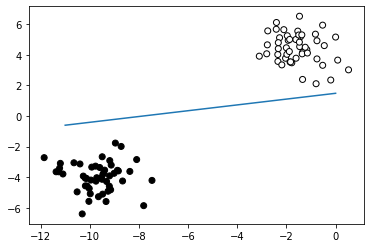

In [40]:
draw_05_line()
print(w0, w1, b)

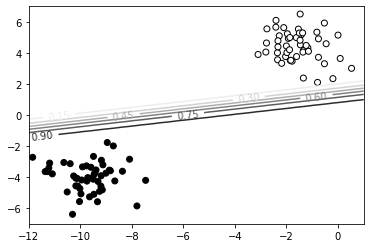

In [31]:
draw_prob_contours()

tensor(-0.0010)
tensor([0.0002, 0.0040, 0.0015])


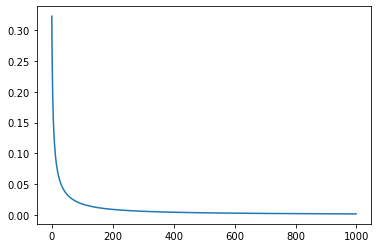

In [32]:
plt.plot(range(len(cost)),cost)
err = (cost[-1]-cost[-2])/cost[-2]
dC=calc_dC()
print(err,dC,sep='\n')